# SKEMA-TA1-UAZ-MORAE Demo (2022-12-08)

**Authors**: Justin Lieffers, Liang Zhang, Deepsana Shahi, Adarsh Pyarelal, Clayton Morrison

In [9]:
# Set the base URL
BASE_URL="http://localhost:8080"

In [23]:
from IPython.display import IFrame, Image, display
IFrame(f"{BASE_URL}/docs/", width=700, height=350)

## Model role identification

One of the prerequisites for model role identification is the ability to efficiently query GroMEts, including path traversal queries. For this reason, we have adopted a graph database backend for storing the structure inherent in GroMEt JSON files, along with additional metadata to speed up queries.

Below, we demonstrate how to interact with this database using our REST API.

First, we perform our imports and set the base URL

In [11]:
import json
from requests import get, put, post, delete

Then, we check if the service is running.

In [8]:
get(f"{BASE_URL}/ping").text

[]

We now have functionality to ingest GroMEt JSON files (still working on adding domain coverage for this pipeline). Below we take `sir_core--Gromet-FN-auto.json` and return AMR JSONs. This gromet comes from a core dynamics python script of an SIR model. There exists endpoints for PetriNets (PN) and RegNets (RN). However, RN's aren't fully supported yet as more test cases are needed. 

These are currently "barebones" AMR's in that it just has the structural data, but are something to build and expand on. 

In [20]:
with open('data/sir_core--Gromet-FN-auto.json') as f:
    r = put(f"{BASE_URL}/models/PN", json=json.load(f))
r.json()

{'name': 'mathml model',
 'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/petrinet_v0.1/petrinet/petrinet_schema.json',
 'schema_name': 'PetriNet',
 'description': 'This is a model from mathml equations',
 'model_version': '0.1',
 'model': {'states': [{'id': 'i', 'name': 'i'},
   {'id': 'r', 'name': 'r'},
   {'id': 's', 'name': 's'}],
  'transitions': [{'id': 'beta',
    'input': ['i', 's'],
    'output': ['i', 'i'],
    'grounding': None},
   {'id': 'gamma', 'input': ['i'], 'output': ['r'], 'grounding': None}]}}

There is also support for converting mathml into AMR's, either PetriNets or RegNets again. Once again only "barebones" AMR's immediately. 

Below is for regnets using lotka voltera mathml

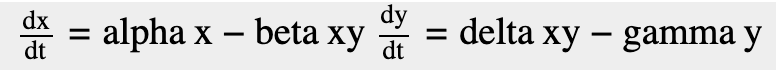

{'name': 'Regnet mathml model',
 'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/regnet_v0.1/regnet/regnet_schema.json',
 'schema_name': 'regnet',
 'description': 'This is a Regnet model from mathml equations',
 'model_version': '0.1',
 'model': {'vertices': [{'id': 'x',
    'name': 'x',
    'rate_constant': 'alpha',
    'sign': True},
   {'id': 'y', 'name': 'y', 'rate_constant': 'gamma', 'sign': False}],
  'edges': [{'id': 'beta',
    'source': ['y'],
    'target': ['x'],
    'sign': False,
    'grounding': None,
    'properties': {'rate_constant': 'beta'}},
   {'id': 'delta',
    'source': ['x'],
    'target': ['y'],
    'sign': True,
    'grounding': None,
    'properties': {'rate_constant': 'delta'}}]}}

In [24]:
mathml_vec = []

with open("data/lotka_voltera/mml_list.txt") as file:
    for line in file:
        mathml_vec.append(line.rstrip())

display(Image(filename='data/lotka_voltera/mml_list_image.png'))

headers = {
    "Content-Type": "application/json"
}

r = put(f"{BASE_URL}/mathml/regnet", data=json.dumps(mathml_vec), headers=headers)
r.json()

We can also generate for a petrinet, below is an example with sir mathml

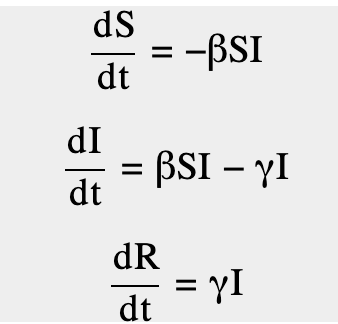

{'name': 'mathml model',
 'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/petrinet_v0.1/petrinet/petrinet_schema.json',
 'schema_name': 'PetriNet',
 'description': 'This is a model from mathml equations',
 'model_version': '0.1',
 'model': {'states': [{'id': 'I', 'name': 'I'},
   {'id': 'R', 'name': 'R'},
   {'id': 'S', 'name': 'S'}],
  'transitions': [{'id': 'β',
    'input': ['I', 'S'],
    'output': ['I', 'I'],
    'grounding': None},
   {'id': 'γ', 'input': ['I'], 'output': ['R'], 'grounding': None}]}}

In [25]:
mathml_vec = []

with open("data/simple_sir_v1/mml_list.txt") as file:
    for line in file:
        mathml_vec.append(line.rstrip())

display(Image(filename='data/simple_sir_v1/mml_list_image.png'))

headers = {
    "Content-Type": "application/json"
}

r = put(f"{BASE_URL}/mathml/petrinet", data=json.dumps(mathml_vec), headers=headers)

# exporting the JSON: 
with open("data/SIR_example.json", "w") as outfile:
    outfile.write(json.dumps(r.json()))

r.json()

Lastly we also have support to route the mathml based on the model type if given as json object as the following:

In [14]:
class MathmlModel:
    def __init__(self, mathml, model):
        self.mathml = mathml
        self.model = model
    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)

mathml_vec = []

with open("data/lotka_voltera/mml_list.txt") as file:
    for line in file:
        mathml_vec.append(line.rstrip())

lotka_voltera = MathmlModel(mathml_vec, "regnet")

headers = {
    "Content-Type": "application/json"
}

print(lotka_voltera.toJSON())

r = put(f"{BASE_URL}/mathml/amr", data=lotka_voltera.toJSON(), headers=headers)
r.json()

{
    "mathml": [
        "<math><mrow><mfrac><mrow><mi>d</mi><mi>x</mi></mrow><mrow><mi>d</mi><mi>t</mi></mrow></mfrac><mo>=</mo><mi>alpha</mi><mi>x</mi><mo>-</mo><mi>beta</mi><mi>x</mi><mi>y</mi></mrow></math>",
        "<math><mrow><mfrac><mrow><mi>d</mi><mi>y</mi></mrow><mrow><mi>d</mi><mi>t</mi></mrow></mfrac><mo>=</mo><mi>delta</mi><mi>x</mi><mi>y</mi><mo>-</mo><mi>gamma</mi><mi>y</mi></mrow></math>"
    ],
    "model": "regnet"
}


{'name': 'Regnet mathml model',
 'schema': 'https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/regnet_v0.1/regnet/regnet_schema.json',
 'schema_name': 'regnet',
 'description': 'This is a Regnet model from mathml equations',
 'model_version': '0.1',
 'model': {'vertices': [{'id': 'y',
    'name': 'y',
    'rate_constant': 'gamma',
    'sign': False},
   {'id': 'x', 'name': 'x', 'rate_constant': 'alpha', 'sign': True}],
  'edges': [{'id': 'delta',
    'source': ['x'],
    'target': ['y'],
    'sign': True,
    'grounding': None,
    'properties': {'rate_constant': 'delta'}},
   {'id': 'beta',
    'source': ['y'],
    'target': ['x'],
    'sign': False,
    'grounding': None,
    'properties': {'rate_constant': 'beta'}}]}}

TODO: Render the equations for mathml, export the json of the AMR, install the AMR alignment functions, and run the alignment below